In [1]:
from synthcity.plugins import Plugins


<stdin>:1:10: fatal error: 'omp.h' file not found
#include <omp.h>
         ^~~~~~~
1 error generated.


[KeOps] Warning : omp.h header is not in the path, disabling OpenMP.
[KeOps] Warning : Cuda libraries were not detected on the system ; using cpu only mode


In [2]:
import warnings 
warnings.filterwarnings('ignore')

In [4]:
# categories=["generic", "privacy", "time_series", "domain_adaptation"]
Plugins().list()

[2023-10-23T21:03:25.425375+0800][55857][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-10-23T21:03:25.427056+0800][55857][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-10-23T21:03:25.428281+0800][55857][CRITICAL] module plugin_great load failed


['dummy_sampler',
 'bayesian_network',
 'marginal_distributions',
 'survival_nflow',
 'tvae',
 'goggle',
 'rtvae',
 'survae',
 'dpgan',
 'image_cgan',
 'nflow',
 'image_adsgan',
 'ddpm',
 'survival_ctgan',
 'aim',
 'survival_gan',
 'timevae',
 'radialgan',
 'privbayes',
 'fflows',
 'ctgan',
 'timegan',
 'pategan',
 'uniform_sampler',
 'decaf',
 'adsgan',
 'arf']

- fflows # FFlows is an explicit likelihood model based on a novel class of normalizing flows that view time-series data in the frequency-domain rather than the time-domain. The method uses a discrete Fourier transform (DFT) to convert variable-length time-series with arbitrary sampling periods into fixed-length spectral representations, then applies a (data-dependent) spectral filter to the frequency-transformed time-series.	


- adsgan # A conditional GAN framework that generates synthetic data while minimize patient identifiability that is defined based on the probability of re-identification given the combination of all data on any individual patient	

- radialgan - RadialGAN is an approach to the problem in which multiple GAN architectures are used to learn to translate from one dataset to another, thereby allowing to augment the target dataset effectively and learning better predictive models than just the target dataset.


rtvae - A robust variational autoencoder with β divergence for tabular data (RTVAE) with mixed categorical and continuous features.	
nflow - Normalizing Flows are generative models which produce tractable distributions where both sampling and density evaluation can be efficient and exact.	
arf - Adversarial Random Forests for Density Estimation and Generative Modeling	
ddpm - TabDDPM: Modelling Tabular Data with Diffusion Models.	
goggle - GOGGLE: Generative Modelling for Tabular Data by Learning Relational Structure	

# Models 

## 1. DDPM

In [16]:
ddpm_model = Plugins().get("ddpm")

[2023-10-24T14:33:38.977961+0800][55857][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-10-24T14:33:38.981129+0800][55857][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-10-24T14:33:38.982337+0800][55857][CRITICAL] module plugin_great load failed


## 2. GOGGLE 

In [17]:
goggle_synthesizer = Plugins().get("goggle")

[2023-10-24T14:33:39.768792+0800][55857][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-10-24T14:33:39.779689+0800][55857][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-10-24T14:33:39.787000+0800][55857][CRITICAL] module plugin_great load failed


## 3. nflow

In [18]:
nflow_synthesizer = Plugins().get("nflow")

[2023-10-24T14:33:40.981546+0800][55857][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-10-24T14:33:40.991092+0800][55857][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-10-24T14:33:40.996356+0800][55857][CRITICAL] module plugin_great load failed


## 4. ARF

In [14]:
arf_synthesizer = Plugins().get("arf")

[2023-10-24T13:40:48.719193+0800][55857][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-10-24T13:40:48.720432+0800][55857][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-10-24T13:40:48.721167+0800][55857][CRITICAL] module plugin_great load failed


## 5. CTGAN

In [ ]:
arf_synthesizer = Plugins().get("ctgan")

## 6. TVAE

In [ ]:
arf_synthesizer = Plugins().get("tvae")

## 7. RTVAE

In [ ]:
arf_synthesizer = Plugins().get("rtvae")

## Generating data with Synthcity 

In [ ]:
from sklearn.datasets import load_iris
from synthcity.plugins.core.dataloader import GenericDataLoader
from synthcity.plugins.core.constraints import Constraints

# Load in `test_plugin` the generative model of choice
# ....

X, y = load_iris(as_frame=True, return_X_y=True)
X["target"] = y

X = GenericDataLoader(X)
test_plugin.fit(X, cond=y)

count = 10
X_gen = test_plugin.generate(count, cond=np.ones(count))

# The Conditional only optimizes the output generation
# for GANs and VAEs, but does NOT guarantee the samples
# are only from that condition.
# If you want to guarantee that output contains only
# "target" == 1 samples, use Constraints.

constraints = Constraints(
    rules=[
        ("target", "==", 1),
    ]
)
X_gen = test_plugin.generate(count,
        cond=np.ones(count),
        constraints=constraints
       )
assert (X_gen["target"] == 1).all()

# Hyperparameter Optimisation 

In [6]:
# third party
import optuna

In [30]:
from sklearn.datasets import load_diabetes
# synthcity absolute
import sys
import synthcity.logger as log

log.add(sink=sys.stderr, level="INFO")
warnings.filterwarnings("ignore")

In [33]:
X, y = load_diabetes(return_X_y=True, as_frame=True)
X["target"] = y
X.head()

age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0

In [17]:
loader = GenericDataLoader(
    X,
    target_column="target",
    sensitive_columns=["sex"],
)
train_loader, test_loader = loader.train(), loader.test()

In [3]:
PLUGIN = "tvae"
plugin_cls = type(Plugins().get(PLUGIN))
plugin_cls

[2023-10-26T16:24:21.659069+0800][47009][CRITICAL] load failed: 
GReaT is not installed. Please install it with pip install GReaT.
Please be aware that GReaT is only available for python >= 3.9.

[2023-10-26T16:24:21.660227+0800][47009][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-10-26T16:24:21.660902+0800][47009][CRITICAL] module plugin_great load failed


synthcity.plugins.generic.plugin_tvae.TVAEPlugin

In [4]:
plugin_cls.hyperparameter_space()

[IntegerDistribution(name='n_iter', data=None, random_state=0, marginal_distribution=None, low=100, high=500, step=100),
 CategoricalDistribution(name='lr', data=None, random_state=0, marginal_distribution=None, choices=[0.0001, 0.0002, 0.001]),
 IntegerDistribution(name='decoder_n_layers_hidden', data=None, random_state=0, marginal_distribution=None, low=1, high=5, step=1),
 CategoricalDistribution(name='weight_decay', data=None, random_state=0, marginal_distribution=None, choices=[0.0001, 0.001]),
 CategoricalDistribution(name='batch_size', data=None, random_state=0, marginal_distribution=None, choices=[64, 128, 256, 512]),
 IntegerDistribution(name='n_units_embedding', data=None, random_state=0, marginal_distribution=None, low=50, high=500, step=50),
 IntegerDistribution(name='decoder_n_units_hidden', data=None, random_state=0, marginal_distribution=None, low=50, high=500, step=50),
 CategoricalDistribution(name='decoder_nonlin', data=None, random_state=0, marginal_distribution=None

In [10]:
from synthcity.utils.optuna_sample import suggest_all

trial = optuna.create_study().ask()
params = suggest_all(trial, plugin_cls.hyperparameter_space())
params['n_iter'] = 100  # speed up
params

{'n_iter': 100,
 'lr': 0.001,
 'decoder_n_layers_hidden': 2,
 'weight_decay': 0.001,
 'batch_size': 256,
 'n_units_embedding': 250,
 'decoder_n_units_hidden': 250,
 'decoder_nonlin': 'relu',
 'decoder_dropout': 0.1178671160929543,
 'encoder_n_layers_hidden': 4,
 'encoder_n_units_hidden': 350,
 'encoder_nonlin': 'relu',
 'encoder_dropout': 0.19177728216094914}

In [18]:
from synthcity.benchmark import Benchmarks

plugin = plugin_cls(**params).fit(train_loader)
report = Benchmarks.evaluate(
    [("trial", PLUGIN, params)],
    train_loader,  # Benchmarks.evaluate will split out a validation set
    repeats=1,
    metrics={"detection": ["detection_mlp"]},  # DELETE THIS LINE FOR ALL METRICS
)
report['trial']

[2023-10-26T16:27:49.840046+0800][47009][INFO] Encoding age 411655579748589996
[2023-10-26T16:27:49.840046+0800][47009][INFO] Encoding age 411655579748589996
[2023-10-26T16:27:50.260495+0800][47009][INFO] Encoding sex 6040956189383244647
[2023-10-26T16:27:50.260495+0800][47009][INFO] Encoding sex 6040956189383244647
[2023-10-26T16:27:50.267541+0800][47009][INFO] Encoding bmi 490209169643524866
[2023-10-26T16:27:50.267541+0800][47009][INFO] Encoding bmi 490209169643524866
[2023-10-26T16:27:50.416833+0800][47009][INFO] Encoding bp 6327300469211589724
[2023-10-26T16:27:50.416833+0800][47009][INFO] Encoding bp 6327300469211589724
[2023-10-26T16:27:50.607299+0800][47009][INFO] Encoding s1 3662630540313495207
[2023-10-26T16:27:50.607299+0800][47009][INFO] Encoding s1 3662630540313495207
[2023-10-26T16:27:50.805973+0800][47009][INFO] Encoding s2 8939625568531111751
[2023-10-26T16:27:50.805973+0800][47009][INFO] Encoding s2 8939625568531111751
[2023-10-26T16:27:50.993075+0800][47009][INFO] Enc

min       max      mean  stddev    median  \
detection.detection_mlp.mean  0.529891  0.529891  0.529891     0.0  0.529891   

                              iqr rounds errors  durations direction  
detection.detection_mlp.mean  0.0      1      0       0.68  minimize

In [19]:
def objective(trial: optuna.Trial):
    hp_space = Plugins().get(PLUGIN).hyperparameter_space()
    hp_space[0].high = 100  # speed up for now
    params = suggest_all(trial, hp_space)
    ID = f"trial_{trial.number}"
    try:
        report = Benchmarks.evaluate(
            [(ID, PLUGIN, params)],
            train_loader,
            repeats=1,
            metrics={"detection": ["detection_mlp"]},  # DELETE THIS LINE FOR ALL METRICS
        )
    except Exception as e:  # invalid set of params
        print(f"{type(e).__name__}: {e}")
        print(params)
        raise optuna.TrialPruned()
    score = report[ID].query('direction == "minimize"')['mean'].mean()
    # average score across all metrics with direction="minimize"
    return score

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=2)
study.best_params

[2023-10-26T16:28:50.378923+0800][47009][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-10-26T16:28:50.378923+0800][47009][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-10-26T16:28:50.378923+0800][47009][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-10-26T16:28:50.381671+0800][47009][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-10-26T16:28:50.381671+0800][47009][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-10-26T16:28:50.381671+0800][47009][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-10-26T16:28:50.383985+0800][47009][CRITICAL] module plugin_great load failed
[2023-10-26T16:28:50.383985+0800][47009][CRITICAL] module plugin_great load failed
[2023-

{'n_iter': 100,
 'lr': 0.0002,
 'decoder_n_layers_hidden': 1,
 'weight_decay': 0.001,
 'batch_size': 128,
 'n_units_embedding': 400,
 'decoder_n_units_hidden': 100,
 'decoder_nonlin': 'leaky_relu',
 'decoder_dropout': 0.04435558595433056,
 'encoder_n_layers_hidden': 1,
 'encoder_n_units_hidden': 450,
 'encoder_nonlin': 'leaky_relu',
 'encoder_dropout': 0.08612011995954438}

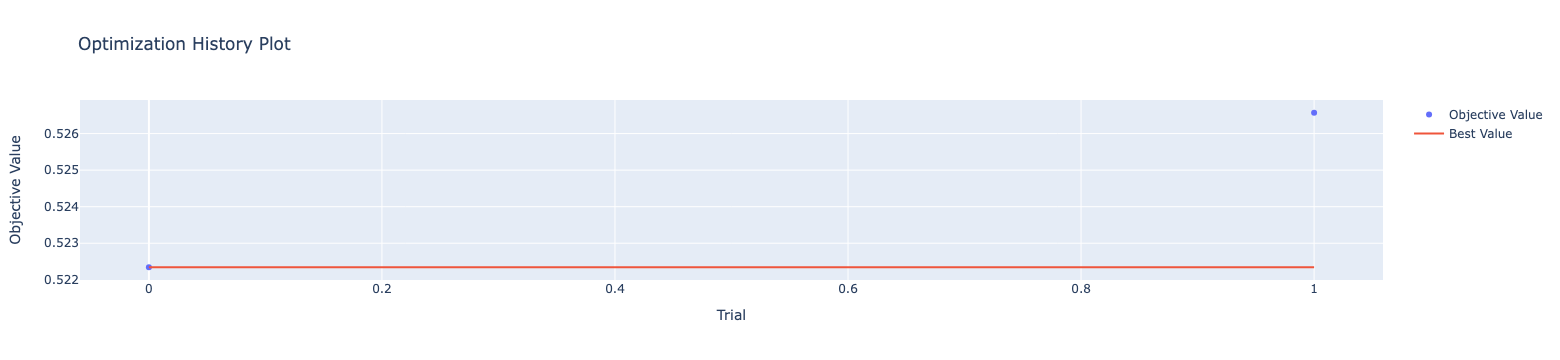

In [20]:
from optuna.visualization import plot_contour
from optuna.visualization import plot_edf
from optuna.visualization import plot_optimization_history
from optuna.visualization import plot_parallel_coordinate
from optuna.visualization import plot_param_importances
from optuna.visualization import plot_slice

plot_optimization_history(study)

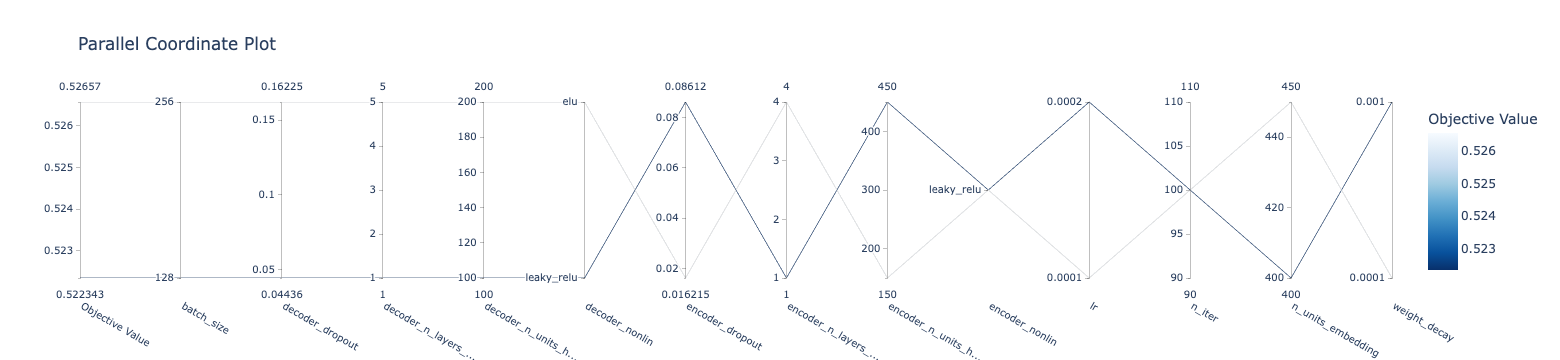

In [21]:
# Visualize high-dimensional parameter relationships. 
plot_parallel_coordinate(study)

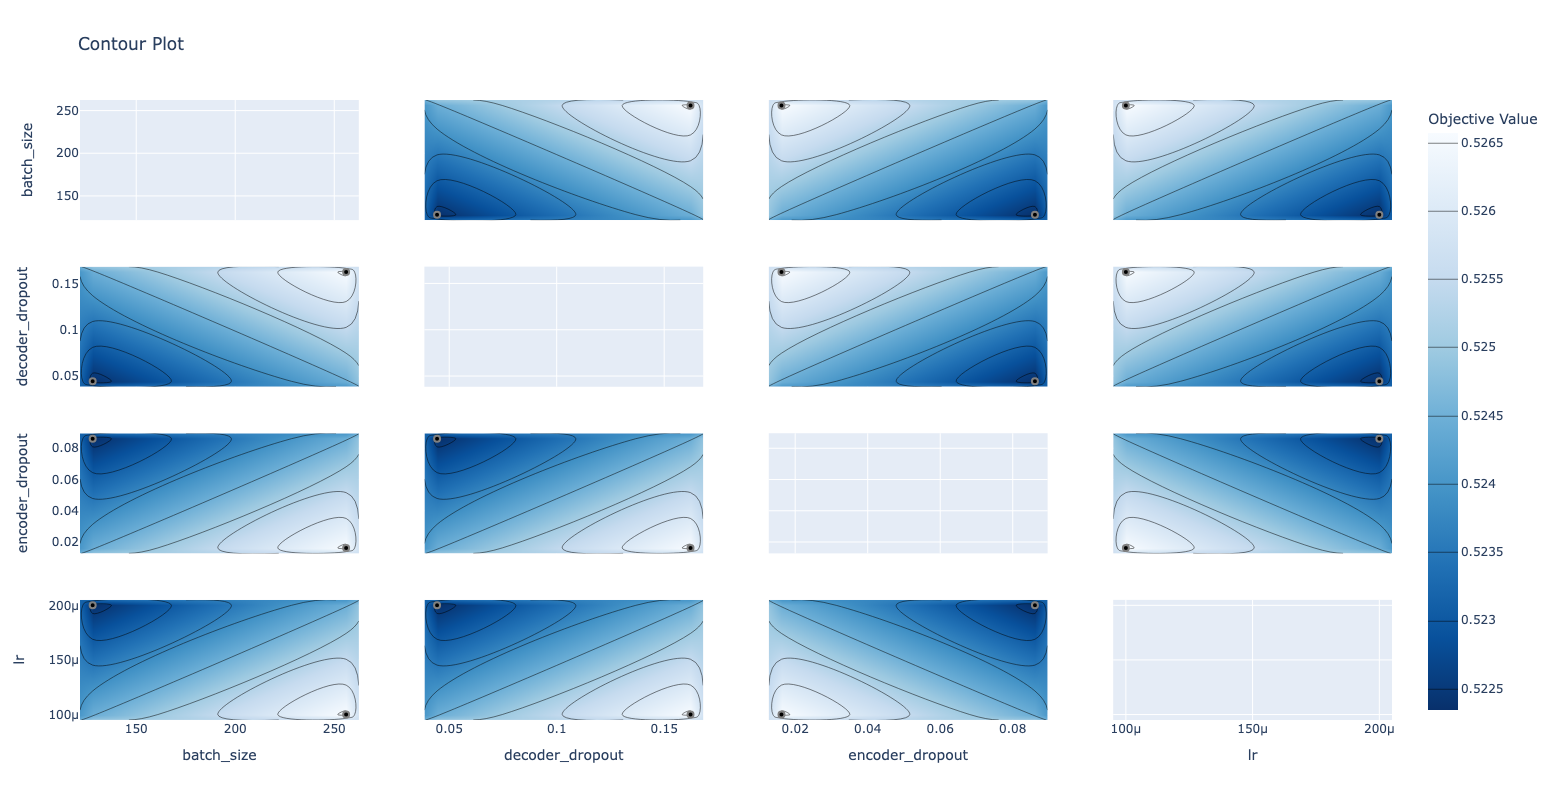

In [22]:
# Visualize hyperparameter relationships.
fig = plot_contour(study, params=['batch_size', 'lr', 'encoder_dropout', 'decoder_dropout'])
fig.update_layout(width=800, height=800)

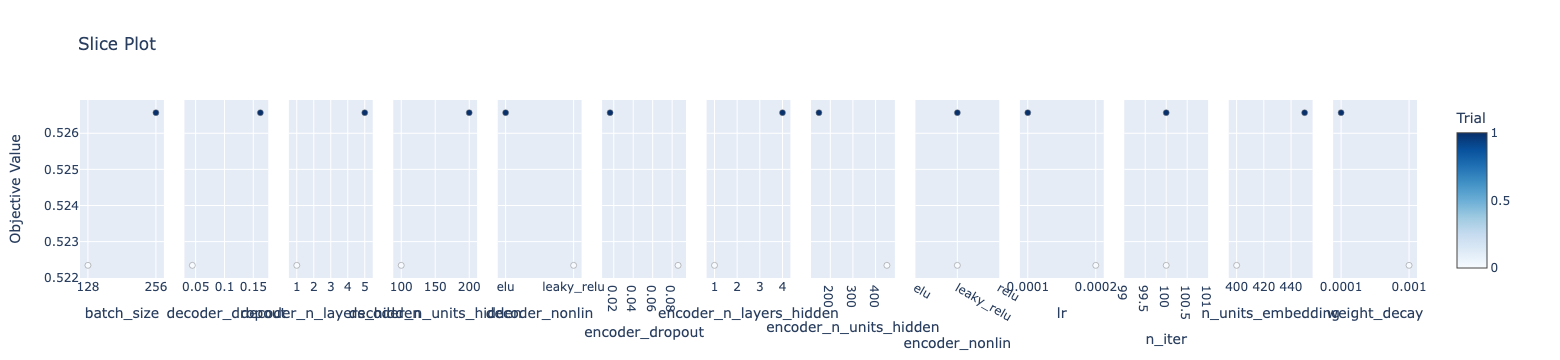

In [23]:
# Visualize individual hyperparameters as slice plot.
plot_slice(study)

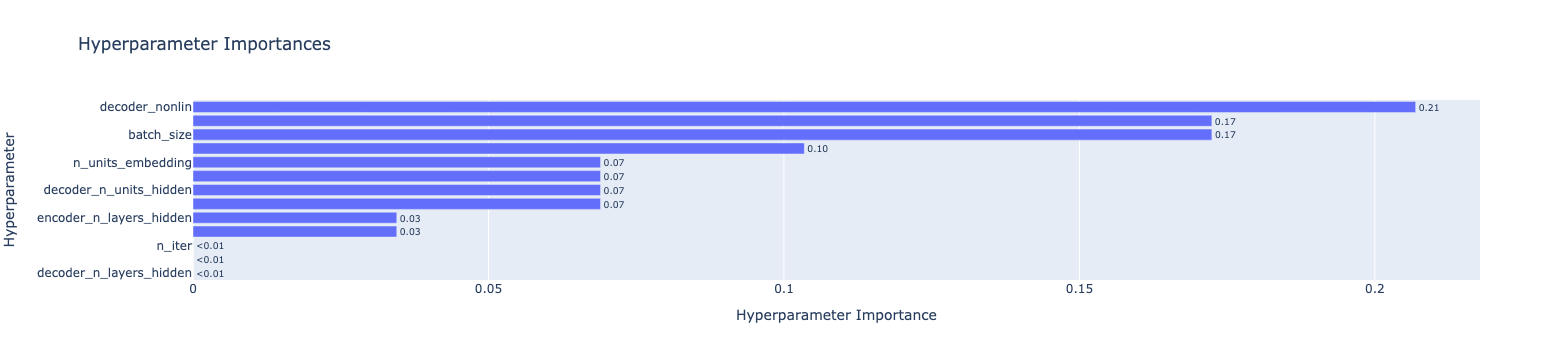

In [24]:
# Visualize parameter importances.
plot_param_importances(study)

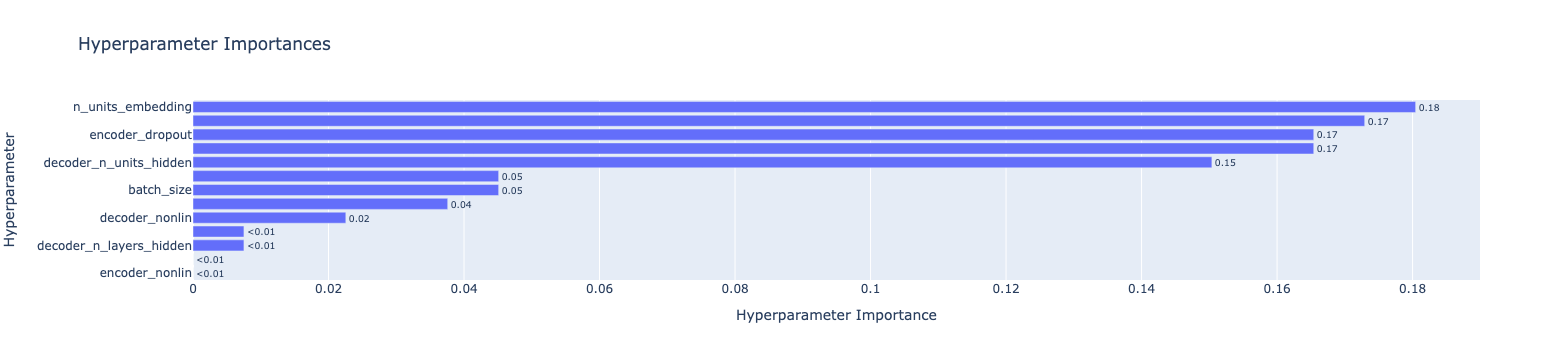

In [25]:
# Learn which hyperparameters are affecting the trial duration with hyperparameter importance.
optuna.visualization.plot_param_importances(
    study, target=lambda t: t.duration.total_seconds(), target_name="duration"
)

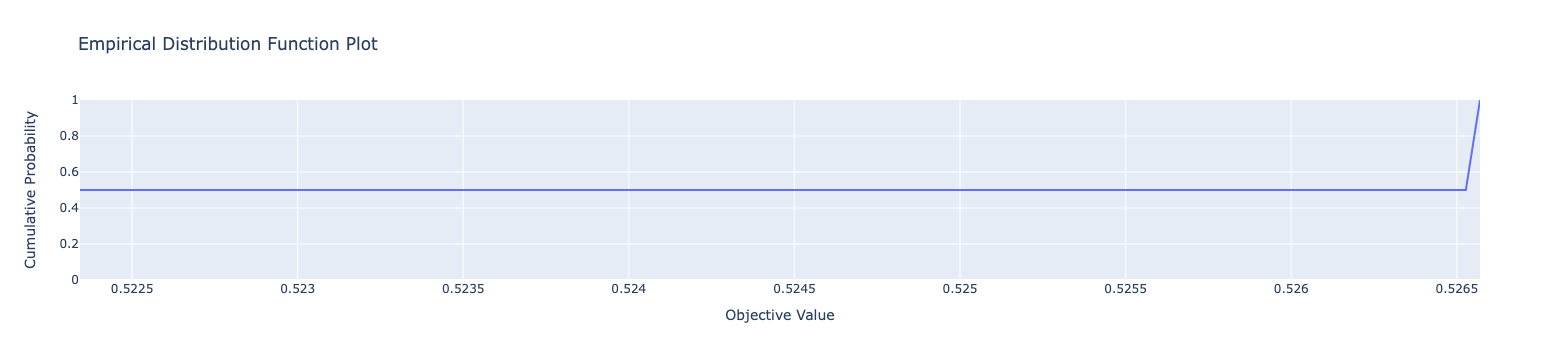

In [26]:
# Visualize empirical distribution function of the objective.
plot_edf(study)

In [27]:
best_params = study.best_params
report = Benchmarks.evaluate(
    [("test", PLUGIN, best_params)],
    train_loader,
    test_loader,
    repeats=1,
    metrics={"detection": ["detection_mlp", "detection_xgb"]},  # DELETE THIS LINE FOR ALL METRICS
)
Benchmarks.print(report)

[2023-10-26T16:30:48.355852+0800][47009][INFO] Testcase : test
[2023-10-26T16:30:48.355852+0800][47009][INFO] Testcase : test
[2023-10-26T16:30:48.359083+0800][47009][INFO] [testcase] Experiment repeat: 0 task type: classification Train df hash = 4860132070743273254
[2023-10-26T16:30:48.359083+0800][47009][INFO] [testcase] Experiment repeat: 0 task type: classification Train df hash = 4860132070743273254
[2023-10-26T16:30:48.360622+0800][47009][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-10-26T16:30:48.360622+0800][47009][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-10-26T16:30:48.360622+0800][47009][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-10-26T16:30:48.362298+0800][47009][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-10-26T16:30:48.362298+0800][47009]


Plugin : test


min       max      mean  stddev    median  \
detection.detection_xgb.mean  0.995556  0.995556  0.995556     0.0  0.995556   
detection.detection_mlp.mean  0.488889  0.488889  0.488889     0.0  0.488889   

                              iqr rounds errors  durations  
detection.detection_xgb.mean  0.0      1      0       0.08  
detection.detection_mlp.mean  0.0      1      0       0.74